# Reshaping Data with Pandas

## Introduction to Data Reshaping

### Wide and long data formats

You will learn
- Wide and long formats
- Long to wide transformation
- Wide to long transformation
- Stacking and unstacking columns
- Reshaping and handling complex data, such as string columns or JSON data

Why it is important
- Tidy datasets
- Data is not in the appropriate format for analysis:
    - Human readable vs. statistical analysis
- Nested data in DataFrames is complex to handle
- Get summary statistics for multi-level index DataFrames

Shape of data
- The way in which a dataset is organized in rows and columns

In [ ]:
fifa_players = pd.read_csv("fifa_players.csv")
fifa_players
    # name age nationality club
# 0 Lionel Messi 32 Argentina Barcelona
# 1 Cristiano Ronaldo 34 Portugal Juventus
# 2 Neymar da Silva 27 Brazil Saint-Germain

fifa_players.shape
# (3, 4)

Wide format

In [ ]:
fifa_players
    # name age nationality club
# 0 Lionel Messi 32 Argentina Barcelona
# 1 Cristiano Ronaldo 34 Portugal Juventus
# 2 Neymar da Silva 27 Brazil Saint-Germain

- Each feature is in a separate column
- Each rows contains many features of the same player
- No repetition but large number of missing values
- **Simple statistics and imputation**

Long format

In [ ]:
fifa_players_long.head()
    # name variable value
# 0 Cristiano Ronaldo nationality Portugal
# 1 Cristiano Ronaldo club Juventus
# 2 Lionel Messi age 32
# 3 Lionel Messi nationality Argentina
# 4 Lionel Messi club Barcelona

- Each row represents one feature
- Multiple rows for each player
- A column ( name ) to identify same player
- Tidy data:
    - Better to summarize data
    - Key-value pairs
    - **Preferred for analysis and graphing**

Reshaping data
- Transforming a DataFrame or Series structure to adjust it for analysis
    - Transposing a DataFrame

In [ ]:
fifa_players.set_index('club')
            # name age nationality
# club
# Barcelona Lionel Messi 32 Argentina
# Juventus Cristiano Ronaldo NaN Portugal
# Saint-Germain Neymar da Silva 27 Brazil

fifa_players.set_index('club')[['name','nationality']]
                # name nationality
# club
# Barcelona Lionel Messi Argentina
# Juventus Cristiano Ronaldo Portugal
# Saint-Germain Neymar da Silva Brazil

fifa_players.set_index('club')[['name','nationality']].transpose()
# club Barcelona Juventus Saint-Germain
# name Lionel Messi Cristiano Ronaldo Neymar da Silva
# nationality Argentina Portugal Brazil

Reshaping data
- Converting data from wide to long format and vice versa
- Unit of analysis:
    - Long format -> characteristic of a player
    - Wide format -> each player

Wide to long transformation
- Performed using pandas functions, such as:
    - .melt()
    - .wide_to_long()

Long to wide format
- Transform data using pandas methods, for example:
    - .pivot()
    - .pivot_table()

In [ ]:
#Example
# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('name')[['height', 'weight']].transpose()

# Print fifa_transpose
print(fifa_transpose)

### Reshaping using pivot method

From long to wide
- Demonstrate relationship between two columns
- Time series operations with the variables
- Operation that requires columns to be the unique variable

https://pandas.pydata.org/docs/user_guide/reshaping.html1

From long to wide: Pivot method

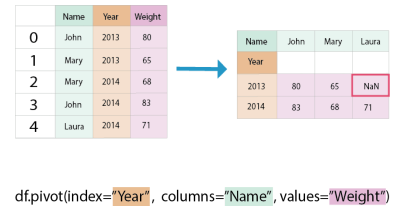

Pivoting a dataset

In [ ]:
fifa = pd.read_csv('fifa_players.csv')
fifa.head()

#     name variable metric_system imperial_system
# 0 Cristiano Ronaldo weight 83 183.00
# 1 J. Oblak weight 87 191.00
# 2 Cristiano Ronaldo height 187 6.13
# 3 J. Oblak height 188 6.16

In [ ]:
fifa.pivot(index='name', columns='variable', values='metric_system')

# variable height weight
# name
# Cristiano Ronaldo 187 83
# J. Oblak 188 87

DFs will have this strange format
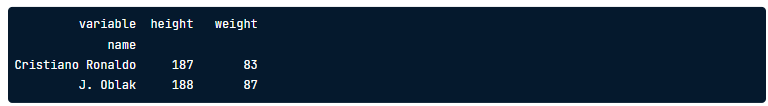

Pivoting multiple columns

In [ ]:
fifa.pivot(index='name', columns='variable', values=['metric_system','imperial_system'])

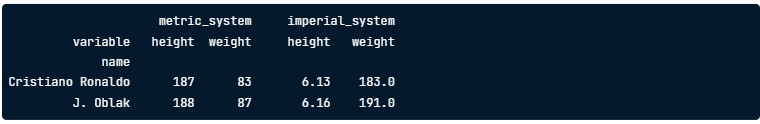

- instead of write both values as above, can just ommit the argument
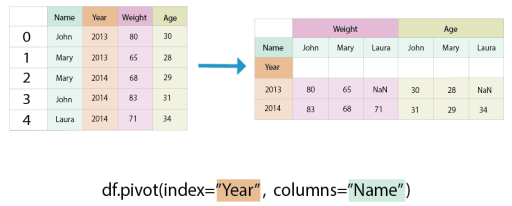

In [ ]:
fifa.pivot(index="name", columns="variable")

# metric_system imperial_system
# variable height weight height weight
# name
# Cristiano Ronaldo 187 83 6.13 183.0
# J. Oblak 188 87 6.16 191.0

Duplicate entries error

In [ ]:
another_fifa.head()

# name variable metric_system imperial_system
# 0 Cristiano Ronaldo weight 83 183.00
# 1 J. Oblak weight 87 191.00
# 2 Cristiano Ronaldo height 187 6.13 <-
# 3 J. Oblak height 188 6.16
# 4 Cristiano Ronaldo height 187 6.14 <-

In [ ]:
another_fifa.pivot(index="name", columns="variable") #don't know which value to use (there are both)
# ValueError: Index contains duplicate entries, cannot reshape 
    
another_fifa = another_fifa.drop(4, axis=0)
another_fifa.pivot(index="name", columns="variable")

# metric_system imperial_system
# variable height weight height weight
# name
# Cristiano Ronaldo 187 83 6.13 183.0
# J. Oblak 188 87 6.16 191.0

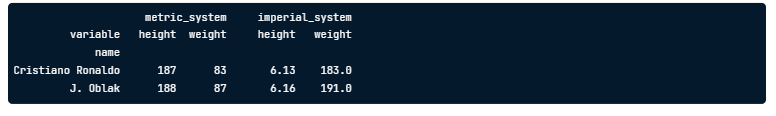

In [ ]:
#Example
# Pivot fifa_players to get overall scores indexed by name and identified by movement
fifa_overall = fifa_players.pivot(index="name", values="overall", columns="movement")

# Print fifa_overall
print(fifa_overall)

# Pivot fifa_players to get attacking scores indexed by name and identified by movement
fifa_attacking = fifa_players.pivot(index = "name", columns = "movement", values = "attacking")

# Print fifa_attacking
print(fifa_attacking)

# Use the pivot method to get overall scores indexed by movement and identified by name
fifa_names = fifa_players.pivot(index = "movement", columns = "name", values = "overall")

# Print fifa_names
print(fifa_names)

In [ ]:
#Example
# Pivot fifa_players to get overall and attacking scores indexed by name and identified by movement
fifa_over_attack = fifa_players.pivot(index= "name", 
                                     columns="movement", 
                                     values=["overall", "attacking"])

# Print fifa_over_attack
print(fifa_over_attack)

# Use pivot method to get all the scores index by name and identified by movement
fifa_all = fifa_players.pivot(index = "name", columns = "movement")

# Print fifa_over_attack
print(fifa_all)

# Drop the fifth row to delete all repeated rows
fifa_no_rep = fifa_players.drop(4, axis=0)

# Pivot fifa players to get all scores by name and movement
fifa_pivot = fifa_no_rep.pivot(index = "name", columns = "movement") 

# Print fifa_pivot
print(fifa_pivot)  

### Pivot tables

Pivot method limitations

In [ ]:
another_fifa.head()

# name variable metric_system imperial_system
# 0 Cristiano Ronaldo weight 83 183.00
# 1 J. Oblak weight 87 191.00
# 2 Cristiano Ronaldo height 187 6.13
# 3 J. Oblak height 188 6.16
# 4 Cristiano Ronaldo height 187 6.14

another_fifa.pivot(index="name", columns="variable")

# Traceback (most recent call last):
# ValueError: Index contains duplicate entries, cannot reshape

Pivot method limitations
- General purpose pivoting
- Index/column pair must be unique
- Cannot aggregate values

Pivot table
- A DataFrame containing statistics that summarizes the data of a larger DataFrame

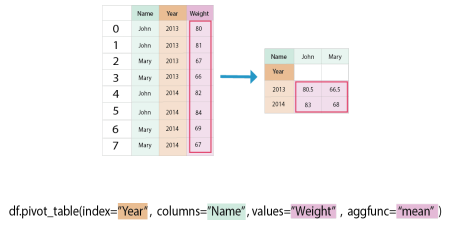

In [ ]:
another_fifa.pivot_table(index="name", columns="variable", aggfunc="mean")
# metric_system imperial_system
# variable height weight height weight
# name
# Cristiano Ronaldo 187 83 6.135 183.0
# J. Oblak 188 87 6.160 191.0

Hierarchical indexes

In [ ]:
fifa_players.head(6)
#     first last movement overall attacking
# 0 Lionel Messi shooting 92 70
# 1 Cristiano Ronaldo shooting 93 89
# 2 Lionel Messi passing 92 92
# 3 Cristiano Ronaldo passing 82 83
# 4 Lionel Messi passing 96 88
# 5 Cristiano Ronaldo passing 89 84

In [ ]:
fifa_players.pivot_table(index=["first", "last"], 
                         columns="movement", 
                         values=["overall", "attacking"], 
                         aggfunc="max")

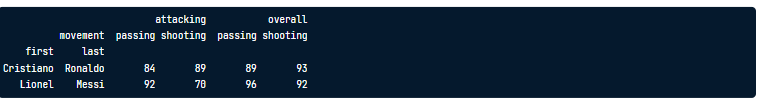

Margins

In [ ]:
fifa_players.pivot_table(index=["first","last"], 
                         columns="movement", 
                         aggfunc="count", 
                         margins=True)

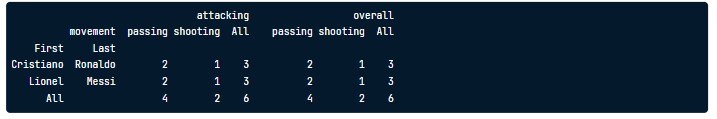

Pivot or pivot table?
- Does the DataFrame have more than one value for each index/column pair?
- Do you need to have a multi-index in your resulting pivoted DataFrame?
- Do you need summary statistics of your large DataFrame?
- Answer of any is Yes! Use .pivot_table()

In [ ]:
#Example
# Discard the fifth row to delete all repeated rows
fifa_drop = fifa_players.drop(4, axis = 0)

# Use pivot method to get all scores by name and movement
fifa_pivot = fifa_drop.pivot(index = "name", columns = "movement") 

# Print fifa_pivot
print(fifa_pivot)  

# Use pivot table to get all scores by name and movement
fifa_pivot_table = fifa_players.pivot_table(index="name", 
                                     columns="movement", 
                                     aggfunc="mean")
# Print fifa_pivot_table
print(fifa_pivot_table)


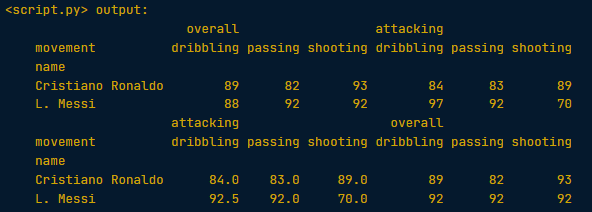

In [ ]:
#Example
# Use pivot table to display mean age of players by club and nationality 
mean_age_fifa = fifa_players.pivot_table(index="nationality", 
                                  columns="club", 
                                  values="age", 
                                  aggfunc="mean")

# Print mean_age_fifa
print(mean_age_fifa)

# Use pivot table to display max height of any player by club and nationality
tall_players_fifa = fifa_players.pivot_table(index="nationality", 
                                     columns="club", 
                                      values="height", 
                                      aggfunc="max")

# Print tall_players_fifa
print(tall_players_fifa)

# Use pivot table to show the count of players by club and nationality and the total count
players_country = fifa_players.pivot_table(index="nationality", 
                                    columns="club", 
                                    values="name", 
                                    aggfunc="count", 
                                    margins=True)

# Print players_country
print(players_country)

In [ ]:
#Example
# Set the argument to get the maximum for each row and column
fifa_mean = fifa_players.pivot_table(index=['nationality', 'club'], 
                                     columns='year', 
                                     aggfunc='max', 
                                     margins=True)

# Print fifa_mean
print(fifa_mean)

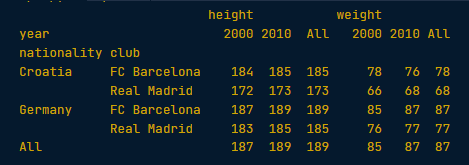

## Converting Between Wide and Long Format

### Reshaping with melt

Wide to long transformation
- Perform analytics
- Plot different variables in the same graph

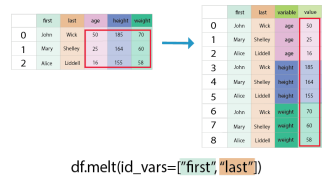
- rest of the columns that are not id_vars (identifiable variables), are melted

Melting data

In [ ]:
books
#      title isbn language pages
# 0 Mostly Harmless 074 eng 260
# 1 The Hitchhiker's Guide 072 eng 215
# 2 El restaurante del fin del mundo 071 spa 250

In [ ]:
books.melt(id_vars='title')
#     title variable value
# 0 Mostly Harmless isbn 074
# 1 The Hitchhiker's Guide isbn 072
# 2 El restaurante del fin del mundo isbn 071
# 3 Mostly Harmless language eng
# 4 The Hitchhiker's Guide language eng
# 5 El restaurante del fin del mundo language spa
# 6 Mostly Harmless pages 260
# 7 The Hitchhiker's Guide pages 215
# 8 El restaurante del fin del mundo pages 250

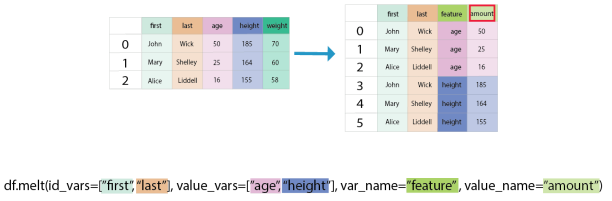
- just want to melt age and height

Specifying values to melt

In [ ]:
books.melt(id_vars='title', value_vars=['language_code','num_pages'])

#         title variable value
# 0 Mostly Harmless language eng
# 1 The Hitchhiker's Guide language eng
# 2 El restaurante del fin del mundo language spa
# 3 Mostly Harmless pages 260
# 4 The Hitchhiker's Guide pages 215
# 5 El restaurante del fin del mundo pages 250

Naming values and variables

In [ ]:
books.melt(id_vars='title', 
           value_vars=['language_code','isbn'], 
           var_name='feature', 
           value_name='code')

# title feature code
# 0 Mostly Harmless isbn 074
# 1 The Hitchhiker's Guide isbn 072
# 2 El restaurante del fin del mundo isbn 071
# 3 Mostly Harmless language eng
# 4 The Hitchhiker's Guide language eng
# 5 El restaurante del fin del mundo language spa

In [ ]:
#Example

# Melt books_gothic using the title column as identifier 
gothic_melted = books_gothic.melt(id_vars="title")

# Print gothic_melted
print(gothic_melted)

# Melt books_gothic using the title, authors, and publisher columns as identifier
gothic_melted_new = books_gothic.melt(id_vars=["title", "authors", "publisher"])

# Print gothic_melted_new
print(gothic_melted_new)

In [ ]:
#Example
# Melt publisher column using title and authors as identifiers
publisher_melted = books_gothic.melt(id_vars=["title", "authors"], 
                                     value_vars="publisher")

# Print publisher_melted
print(publisher_melted)

# Melt rating and rating_count columns using the title as identifier
rating_melted = books_gothic.melt(id_vars="title", 
                                  value_vars=["rating", "rating_count"])

# Print rating_melted
print(rating_melted)

# Melt rating and rating_count columns using title and authors as identifier
books_melted = books_gothic.melt(id_vars=["title", "authors"], 
                                 value_vars=["rating", "rating_count"])

# Print books_melted
print(books_melted)

In [ ]:
#Example
# Melt the rating and rating_count using title, authors and publisher as identifiers
books_ratings = books_gothic.melt(id_vars=["title", "authors", "publisher"], 
                                  value_vars=["rating", "rating_count"])

# Print books_ratings
print(books_ratings)

# Assign the name feature to the new variable column
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'], 
                                  var_name="feature")

# Print books_ratings
print(books_ratings)

# Assign the name number to the new column containing the values
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'], 
                                  var_name='feature', 
                                  value_name="number")

# Print books_ratings
print(books_ratings)

### Wide to long function

Wide to long function
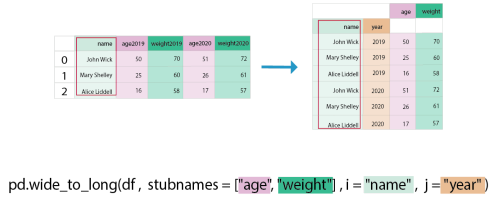
- stubnames is the prefix - the name of the other column
- i: index
- j: second index

Reshaping data

In [ ]:
books
# title ratings2019 sold2019 ratings2020 sold2020
# 0 Mostly Harmless 4.2 456 4.3 436
# 1 The Hitchhiker's Guide 4.8 980 4.9 998
# 2 El restaurante del fin del mundo 4.5 678 4.6 638

In [ ]:
pd.wide_to_long(books, 
                stubnames=['ratings','sold'], 
                i='title', 
                j='year')

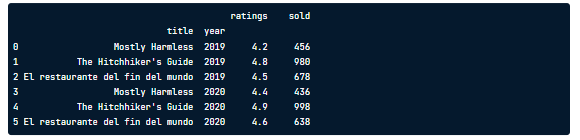

DataFrame with index

In [ ]:
books_with_index
#                  author ratings2019 sold2019
#     title
# 0 To Kill a Mockingbird Harper Lee 4.7 456
# 1 The Hitchhiker's Guide Douglas Adams 4.8 980
# 2 The Black Cat Edgar Alan Poe 4.5 678

pd.wide_to_long(books_with_index, 
                stubnames=['ratings','sold'], 
                i='author', 
                j='year')

#              ratings sold
# author year
# 0 Harper Lee 2019 4.2 456
# 1 Douglas Adams 2019 4.8 980
# 2 Edgar Alan Poe 2019 4.5 678

In [ ]:
books_with_index.reset_index(drop=False, inplace=True) #return the index to df

pd.wide_to_long(books_with_index, 
                stubnames=['ratings','sold'], 
                i=['author','title'], #keep the index
                j='year')

#                               ratings sold
# title author year
# 0 To Kill a Mockingbird Harper Lee 2019 4.7 456
# 1 The Hitchhiker's Guide Douglas Adams 2019 4.8 980
# 2 The Black Cat Edgar Alan Poe 2019 4.5 678

sep argument

In [ ]:
new_books
# title author ratings_2019 sold_2019 ratings_2020 sold_2020
# 0 A Murder Is Announced Agatha Christie 4.4 796 4.8 856
# 1 Sherlock Holmes Sir A. Conan Doyle 4.5 780 4.8 818
# 2 The Sparrow Mary Doria Russell 4.2 178 4.1 238

sep argument

In [ ]:
pd.wide_to_long(new_books, 
                stubnames=['ratings','sold'], 
                i=['title','author'], 
                j='year', 
                sep='_')

#                                            ratings sold
# title                        author   year
# 0 A Murder Is Announced Agatha Christie 2019 4.4 796
# 1 Sherlock Holmes Sir A. Conan Doyle 2019 4.5 780
# 2 The Sparrow Mary Doria Russell 2019 4.2 178
# 3 A Murder Is Announced Agatha Christie 2020 4.8 856
# 4 Sherlock Holmes Sir A. Conan Doyle 2020 4.8 818
# 5 The Sparrow Mary Doria Russell 2020 4.1 238

suffix argument

In [ ]:
another_books
#       title             ratings_one sold_one ratings_two sold_two
# 0 A Murder Is Announced     4.4       796       4.8         856
# 1 Sherlock Holmes           4.5       780       4.8         818
# 2 The Sparrow               4.2       178       4.1         238

In [ ]:
pd.wide_to_long(another_books, 
                stubnames=['ratings','sold'], 
                i='title', 
                j='edition', 
                sep='_', 
                suffix='\w+') #name of the columns ends in a word

#                             ratings sold
#            title        edition
# 0 A Murder Is Announced one 4.4 796
# 1 Sherlock Holmes one 4.5 780
# 2 The Sparrow one 4.2 178
# 3 A Murder Is Announced two 4.8 856
# 4 Sherlock Holmes two 4.8 818
# 5 The Sparrow two 4.1 238

In [ ]:
#Example
# Reshape wide to long using title as index and version as new name, and extracting isbn prefix 
isbn_long = pd.wide_to_long(golden_age, 
                    stubnames="isbn", 
                    i="title", 
                    j="version")

# Print isbn_long
print(isbn_long)
# <script.py> output:
#                                            authors  prefix13  prefix10           isbn
#     title             version                                                        
#     The Great Gatsby  13       F. Scott Fitzgerald       978         1  9780060098919
#     The Short Stories 13          Ernest Hemingway       978         0  9780684837864
#     To the Lighthouse 13            Virginia Woolf       978         0  9780156030472
#     The Great Gatsby  10       F. Scott Fitzgerald       978         1     1572702567
#     The Short Stories 10          Ernest Hemingway       978         0      684837862
#     To the Lighthouse 10            Virginia Woolf       978         0      156030470

# Reshape wide to long using title and authors as index and version as new name, and prefix as wide column prefix
prefix_long = pd.wide_to_long(golden_age, 
                      stubnames="prefix", 
                      i=["title", "authors"], 
                      j="version")

# Print prefix_long
print(prefix_long)

# <script.py> output:
#                                                           isbn13      isbn10  prefix
#     title             authors             version                                   
#     The Great Gatsby  F. Scott Fitzgerald 13       9780060098919  1572702567     978
#                                           10       9780060098919  1572702567       1
#     The Short Stories Ernest Hemingway    13       9780684837864   684837862     978
#                                           10       9780684837864   684837862       0
#     To the Lighthouse Virginia Woolf      13       9780156030472   156030470     978
#                                           10       9780156030472   156030470       0

# Reshape wide to long using title and authors as index and version as new name, and prefix and isbn as wide column prefixes
all_long = pd.wide_to_long(golden_age, 
                   i=["title", "authors"], 
                   j="version", 
                   stubnames=["isbn", "prefix"])

# Print all_long
print(all_long)
# <script.py> output:
#                                                             isbn  prefix
#     title             authors             version                       
#     The Great Gatsby  F. Scott Fitzgerald 13       9780060098919     978
#                                           10          1572702567       1
#     The Short Stories Ernest Hemingway    13       9780684837864     978
#                                           10           684837862       0
#     To the Lighthouse Virginia Woolf      13       9780156030472     978
#                                           10           156030470       0

In [ ]:
#Example
# Specify that wide columns have a suffix containing words
the_code_long = pd.wide_to_long(books_brown, 
                                stubnames=['language', 'publisher'], 
                                i=['author', 'title'], 
                                j='code', 
                                sep='_', 
                                suffix="\w+")

# Print the_code_long
print(the_code_long)

# <script.py> output:
#                                         language     publisher
#     author    title                code                       
#     Dan Brown The Da Vinci Code    code        0            12
#                                    name  english  Random House
#               Angels & Demons      code        0            34
#                                    name  english  Pocket Books
#               La fortaleza digital code       84            43
#                                    name  spanish       Umbriel

In [ ]:
#Example
# Modify books_hunger by resetting the index without dropping it
books_hunger.reset_index(drop=False, inplace=True)

# Reshape using title and language as index, feature as new name, publication and page as prefix separated by space and ending in a word
publication_features = pd.wide_to_long(books_hunger, 
                                       j= "feature", 
                                       stubnames=["publication", "page"], 
                                       i = ["title", "language"], 
                                       sep=" ", 
                                       suffix="\w+")

# Print publication_features
print(publication_features)
# <script.py> output:
#                                             publication   page
#     title                  language feature                   
#     Los Juegos del Hambre  Spanish  date      5/25/2010    NaN
#                                     number            2  374.0
#     Catching Fire          English  date      5/25/2012    NaN
#                                     number            6  391.0
#     Il canto della rivolta Italian  date       6/8/2015    NaN
#                                     number            4  390.0

### Working with string columns

Columns with strings

In [ ]:
books
#         title         raitings_2015   sold_2015  raitings_2016 sold_2016
# 0 The Civil War:Vol. 1       4.3       234            4.2     254
# 1 The Civil War:Vol. 2       4.5       525            4.3     515
# 2 The Civil War:Vol. 3       4.1       242            4.2     251

books['title'].dtypes
# dtype('O')

String methods
- pandas Series string processing methods
- Access easily by str attribute

Splitting into two columns

In [ ]:
books['title'].str.split(':') #list for each row
# 0 [The Civil War, Vol. 1]
# 1 [The Civil War, Vol. 2]
# 2 [The Civil War, Vol. 3]

books['title'].str.split(":").str.get(0)
# 0 The Civil War
# 1 The Civil War
# 2 The Civil War

books['title'].str.split(":", expand=True) #new dataframe
#         0              1
# 0 The Civil War     Vol. 1
# 1 The Civil War     Vol. 2
# 2 The Civil War     Vol. 3

In [ ]:
books[['main_title','subtitle']] = books['title'].str.split(":", expand=True)

books.drop('title', axis=1, inplace=True)
pd.wide_to_long(books, stubnames=['ratings','sold'], i=['main_title','subtitle'], j='year')

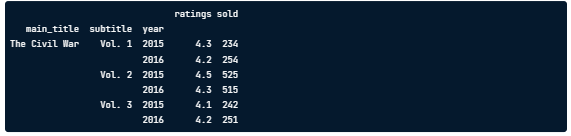

Concatenate two columns

In [ ]:
books_new

#   name_author lastname_author nationality number_books
# 0 Virginia         Wolf       British       50
# 1 Margaret         Atwood     Canadian      40
# 2 Harper           Lee        American      2

In [ ]:
books_new['name_author'].str.cat(books_new['lastname_author'], sep=' ')
# 0 Virginia Wolf
# 1 Margaret Atwood
# 2 Harper Lee

books_new['author'] = books_new['name_author'].str.cat(books_new['lastname_author'], sep=' ')
books_new 
# name_author lastname_author     nationality number_books    author
# 0 Virginia       Wolf              British      50       Virginia Wolf
# 1 Margaret       Atwood            Canadian     40       Margaret Atwood
# 2 Harper         Lee               American      2       Harper Lee

books_new.melt(id_vars='author', value_vars=['nationality','number_books'], var_name='feature', value_name='value')

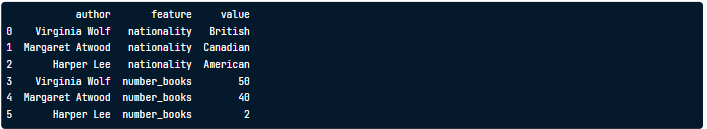

Concatenate index

In [ ]:
comics_marvel.head(2)
#             subtitle year ratings sold
# main_title
# Avengers      Next    1992   4.5   234
# Avengers      Forever 1998   4.6   224

comics_marvel.index = comics_marvel.index.str.cat(comics_marvel['subtitle'], sep='-')
books
#                   subtitle    year ratings sold
# main_title
# Avengers-Next      Next       1992   4.5    234
# Avengers-Forever   Forever    1998   4.6    224
# Avengers-2099      2099       1999   4.8    141

Split index

In [ ]:
comics_marvel.index = comics_marvel.index.str.split('-', expand=True)
comics_marvel

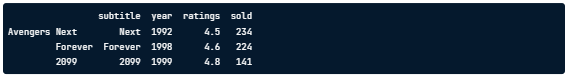

Concatenate Series

In [ ]:
books_new['name_author']
# 0 Virginia
# 1 Margaret
# 2 Harper

new_list = ['Wolf','Atwood','Lee']
books_new['name_author'].str.cat(new_list, sep=' ')
# 0 Virginia Wolf
# 1 Margaret Atwood
# 2 Harper Lee

In [ ]:
#Example
# Split the index of books_dys by the hyphen 
books_dys.index = books_dys.index.str.split("-", expand = False)

# Print books_dys
print(books_dys)
# <script.py> output:
#                              year  num_pages  average_rating  ratings_count
#     title                                                                  
#     [Fahrenheit 451, 1953]   1953        186            4.10          23244
#     [1984, 1949]             1949        268            4.31          14353
#     [Brave New World, 1932]  1932        123            4.30          23535

#Example
# Get the first element after splitting the index of books_dys
books_dys.index = books_dys.index.str.split('-').str.get(0)

# Print books_dys
print(books_dys)

#Example
# Split by the hyphen the index of books_dys
books_dys.index = books_dys.index.str.split('-').str.get(0)

# Concatenate the index with the list author_list separated by a hyphen
books_dys.index = books_dys.index.str.cat(author_list, sep='-')

# Print books_dys
print(books_dys)
# <script.py> output:
#                                    year  num_pages  average_rating  ratings_count
#     title                                                                        
#     Fahrenheit 451-Ray Bradbury    1953        186            4.10          23244
#     1984-George Orwell             1949        268            4.31          14353
#     Brave New World-Aldous Huxley  1932        123            4.30          23535

In [ ]:
#Example
# Concatenate the title and subtitle separated by "and" surrounded by spaces
hp_books['full_title'] = hp_books["title"].str.cat(hp_books["subtitle"], sep =" and ") 

# Print hp_books
print(hp_books)
# <script.py> output:
#               title                   subtitle                     authors  goodreads  amazon                                  full_title
#     0  Harry Potter     the Half-Blood Prince   J.K. Rowling/Mary GrandPré       4.57    4.52     Harry Potter and the Half-Blood Prince 
#     1  Harry Potter  the Order of the Phoenix   J.K. Rowling/Mary GrandPré       4.49    4.44  Harry Potter and the Order of the Phoenix 
#     2  Harry Potter    the Chamber of Secrets                 J.K. Rowling       4.42    4.37    Harry Potter and the Chamber of Secrets 
#     3  Harry Potter   the Prisoner of Azkaban   J.K. Rowling/Mary GrandPré       4.56    4.51   Harry Potter and the Prisoner of Azkaban 
#     4  Harry Potter        The Deathly Hallows  J.K. Rowling/Mary GrandPré       4.42    4.37        Harry Potter and The Deathly Hallows
#     5  Harry Potter      the Sorcerer's Stone   J.K. Rowling/Mary GrandPré       4.47    4.42      Harry Potter and the Sorcerer's Stone 
#     6  Harry Potter        the Goblet of Fire                 J.K. Rowling       4.56    4.51        Harry Potter and the Goblet of Fire

# Concatenate the title and subtitle separated by "and" surrounded by spaces
hp_books['full_title'] = hp_books['title'].str.cat(hp_books['subtitle'], sep =" and ") 

# Split the authors into writer and illustrator columns
hp_books[['writer', 'illustrator']] = hp_books["authors"].str.split("/", expand=True) 

# Print hp_books
print(hp_books)
# <script.py> output:
#               title                   subtitle                     authors  goodreads  amazon                                  full_title        writer    illustrator
#     0  Harry Potter     the Half-Blood Prince   J.K. Rowling/Mary GrandPré       4.57    4.52     Harry Potter and the Half-Blood Prince   J.K. Rowling  Mary GrandPré
#     1  Harry Potter  the Order of the Phoenix   J.K. Rowling/Mary GrandPré       4.49    4.44  Harry Potter and the Order of the Phoenix   J.K. Rowling  Mary GrandPré
#     2  Harry Potter    the Chamber of Secrets                 J.K. Rowling       4.42    4.37    Harry Potter and the Chamber of Secrets   J.K. Rowling           None
#     3  Harry Potter   the Prisoner of Azkaban   J.K. Rowling/Mary GrandPré       4.56    4.51   Harry Potter and the Prisoner of Azkaban   J.K. Rowling  Mary GrandPré
#     4  Harry Potter        The Deathly Hallows  J.K. Rowling/Mary GrandPré       4.42    4.37        Harry Potter and The Deathly Hallows  J.K. Rowling  Mary GrandPré
#     5  Harry Potter      the Sorcerer's Stone   J.K. Rowling/Mary GrandPré       4.47    4.42      Harry Potter and the Sorcerer's Stone   J.K. Rowling  Mary GrandPré
#     6  Harry Potter        the Goblet of Fire                 J.K. Rowling       4.56    4.51        Harry Potter and the Goblet of Fire   J.K. Rowling           None

# Concatenate the title and subtitle separated by "and" surrounded by spaces
hp_books['full_title'] = hp_books['title'].str.cat(hp_books['subtitle'], sep =" and ") 

# Split the authors into writer and illustrator columns
hp_books[['writer', 'illustrator']] = hp_books['authors'].str.split('/', expand=True)

# Melt goodreads and amazon columns into a single column
hp_melt = hp_books.melt(id_vars=["full_title", "writer"], 
                        var_name="source", 
                        value_vars=["goodreads", "amazon"], 
                        value_name="rating")

# Print hp_melt
print(hp_melt)
# <script.py> output:
#                                         full_title        writer     source  rating
#     0      Harry Potter and the Half-Blood Prince   J.K. Rowling  goodreads    4.57
#     1   Harry Potter and the Order of the Phoenix   J.K. Rowling  goodreads    4.49
#     2     Harry Potter and the Chamber of Secrets   J.K. Rowling  goodreads    4.42
#     3    Harry Potter and the Prisoner of Azkaban   J.K. Rowling  goodreads    4.56
#     4         Harry Potter and The Deathly Hallows  J.K. Rowling  goodreads    4.42
#     5       Harry Potter and the Sorcerer's Stone   J.K. Rowling  goodreads    4.47
#     6         Harry Potter and the Goblet of Fire   J.K. Rowling  goodreads    4.56
#     7      Harry Potter and the Half-Blood Prince   J.K. Rowling     amazon    4.52
#     8   Harry Potter and the Order of the Phoenix   J.K. Rowling     amazon    4.44
#     9     Harry Potter and the Chamber of Secrets   J.K. Rowling     amazon    4.37
#     10   Harry Potter and the Prisoner of Azkaban   J.K. Rowling     amazon    4.51
#     11        Harry Potter and The Deathly Hallows  J.K. Rowling     amazon    4.37
#     12      Harry Potter and the Sorcerer's Stone   J.K. Rowling     amazon    4.42
#     13        Harry Potter and the Goblet of Fire   J.K. Rowling     amazon    4.51

In [ ]:
# Split main_title by a colon and assign it to two columns named title and subtitle 
books_sh[['title', 'subtitle']] = books_sh['main_title'].str.split(':', expand=True)

# Split version by a space and assign the second element to the column named volume
books_sh['volume'] = books_sh['version'].str.split(' ').str.get(1)

# Drop the main_title and version columns modifying books_sh
books_sh.drop(["main_title", "version"], axis=1, inplace=True)

# Print books_sh
print(books_sh)
# <script.py> output:
#        number_pages  number_ratings                          title              subtitle volume
#     0          1059           24087                Sherlock Holmes   The Complete Novels      I
#     1           709           26794                Sherlock Holmes   The Complete Novels     II
#     2           334            2184  Adventures of Sherlock Holmes               Memoirs      I
#     3           238            1884  Adventures of Sherlock Holmes               Memoirs     II

# Split main_title by a colon and assign it to two columns named title and subtitle 
books_sh[['title', 'subtitle']] = books_sh['main_title'].str.split(':', expand=True)

# Split version by a space and assign the second element to the column named volume 
books_sh['volume'] = books_sh['version'].str.split(' ').str.get(1)

# Drop the main_title and version columns modifying books_sh
books_sh.drop(['main_title', 'version'], axis=1, inplace=True)

# Reshape using title, subtitle and volume as index, name feature the new variable from columns starting with number, separated by undescore and ending in words 
sh_long = pd.wide_to_long(books_sh, stubnames="number", i=["title", "subtitle", "volume"], 
                  j="feature", sep="_", suffix="\w+")

# Print sh_long 
print(sh_long)
<script.py> output:
#                                                                        number
#     title                         subtitle             volume feature        
#     Sherlock Holmes                The Complete Novels I      pages      1059
#                                                               ratings   24087
#                                                        II     pages       709
#                                                               ratings   26794
#     Adventures of Sherlock Holmes  Memoirs             I      pages       334
#                                                               ratings    2184
#                                                        II     pages       238
#                                                               ratings    1884

## Stacking and Unstacking DataFrames

### Explicit indexes

Row multi-indices (store and manipulate multidimensional data)
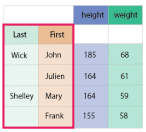

Setting the index

In [ ]:
churn
#   credit_score age country num_products  exited
# 0    619       43  France       1          Yes
# 1    608       34  Germany      0          No
# 2    502       23  France       1          Yes

In [ ]:
churn.set_index(['country','age'], inplace=True)
#              credit_score num_products exited
# age country
# 43 France       619          1          Yes
# 34 Germany      608          0          No
# 23 France       502          1          Yes

MultiIndex from array

In [ ]:
new_array = [['yes','no','yes'], 
             ['no','yes','yes']] #list of lists
churn.index = pd.MultiIndex.from_arrays(new_array, names=['member','credit_card'])

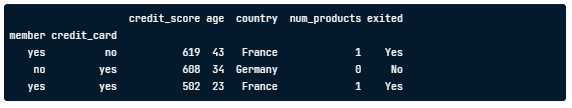

MultiIndex DataFrames
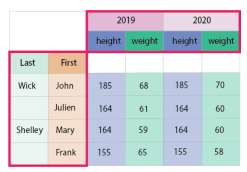

In [ ]:
index = pd.MultiIndex.from_arrays([['Wick','Wick','Shelley','Shelley'],
                                   ['John','Julien','Mary','Frank']],
                                  names=['last','first'])

columns = pd.MultiIndex.from_arrays([['2019','2019','2020','2020'],
                                     ['age','weight','age','weight']],
                                    names=['year','feature'])
patients = pd.DataFrame(data, index=index, columns=columns)
patients

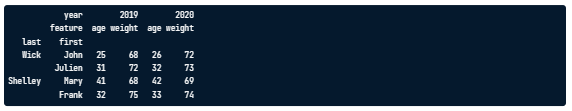

The .stack() method
- Rearrange a level of the columns to obtain a reshaped DataFrame with a new inner-most level row index (same thing as melt?)

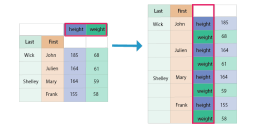

Stack into a series (transforma todas as 5 colunas em um "melt")

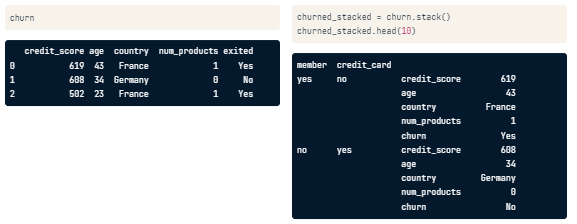

Stack into a DataFrame (compress the last level)

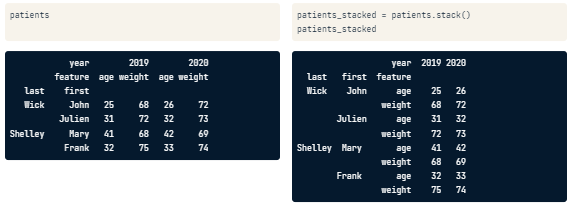

Stack a level by number (choose another level)

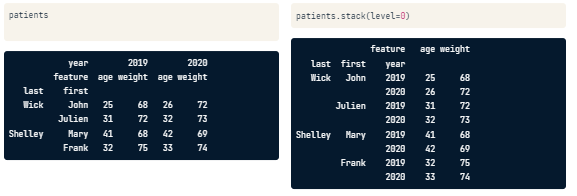

Stack a level by name

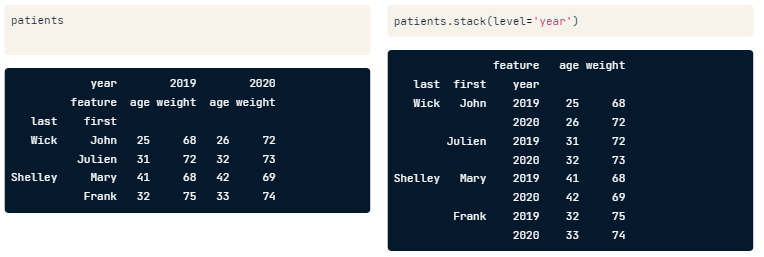

### Slicing and subsetting with .loc and .iloc

Review
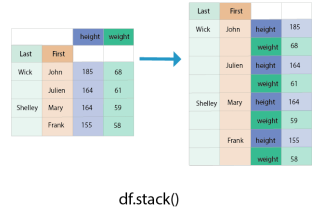

Undoing stacking process
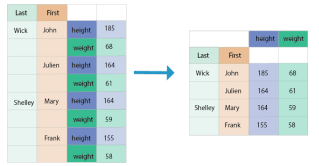

The .unstack() method
- Rearrange a level of the row index into the columns to obtain a reshaped DataFrame with a new inner-most level column index.
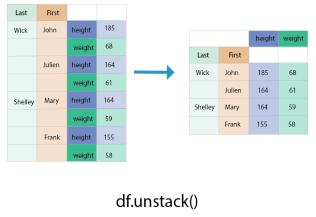

Unstack Series

In [ ]:
churn_stacked
member credit_card
yes no credit_score 619
age 43
country France
num_products 1
churn Yes
no yes credit_score 608
age 34
country Germany
num_products 0
churn No
yes yes credit_score 502
age 23
country France
num_products 1
churn Yes

In [ ]:
churned_stacked.unstack()
credit_score age country num_products exited
member credit_card
no yes 608 34 Germany 0 No
yes no 619 43 France 1 Yes
yes 502 23 France 1 Yes

### Working with pivot tables

## Advanced Reshaping

### Reshaping and combining data

Reshaping and statistical functions

In [ ]:
sales
office supply Technology
shop online onsite online onsite
country year
Italy 2017 310 123 510 340
2018 110 100 610 120
Spain 2017 229 200 300 240
2018 120 220 190 210

Statistical functions
Sum: .sum()
Mean: .mean()
Median: .median()
Dierence: .diff()

Stacking and stats
Total amount of online and on-site sales by year in the two countries


In [ ]:
sales.stack().sum(axis=1)


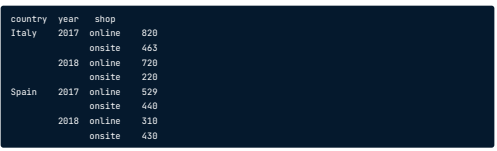

Stacking and stats
Total amount of online and on- site sales by year in the two countries

In [ ]:
sales.stack().sum(axis=1).unstack()
shop online onsite
country year
Italy 2017 820 463
2018 720 220
Spain 2017 529 440
2018 310 430

Unstacking and stats
Mean amount of product sales by year in both countries

In [ ]:
sales.unstack(level=0).mean(axis=1)
year
2017 281.5
2018 210.0

Unstacking and stats
Dierence in the amount of sales between years

In [ ]:
sales["office supply"].unstack(level='country')

Unstacking and stats
Dierence in the amount of sales between years


In [ ]:
sales["office supply"].unstack(level='country').diff(axis=1, periods=2)
office supply
shop online onsite
country Italy Spain Italy Spain
year
2017 NaN NaN -187.0 -29.0
2018 NaN NaN -10.0 100.0

Reshaping and grouping
Total amount of dierent products by online or on-site regardless of the country

In [ ]:
sales.stack().groupby(level='shop').sum()
office supply Technology
shop
online 769 1610
onsite 643 910

Reshaping after grouping
Median amount of products by year

In [ ]:
sales.groupby(level='year').median()
office supply Technology
shop online onsite online onsite
year
2017 269.5 161.5 405.0 290.0
2018 115.0 160.0 400.0 165.0

Reshaping after grouping
Median amount of products by year

In [ ]:
sales.groupby(level=1).median().stack(level=[0, 1]).unstack(level='year')
year 2017 2018
shop
Technology online 405.0 400.0
onsite 290.0 165.0
office supply online 269.5 115.0
onsite 161.5 160.0

### Transforming a list-like column

Transforming list-like columns
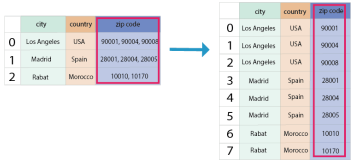

The .explode() method
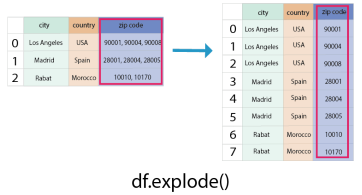

Exploding a column

In [ ]:
cities
city country zip_code
0 Los Angeles USA [90001, 90004, 90008]
1 Madrid Spain [28001, 28004, 28005]
2 Rabat Morocco [10010, 10170]

In [ ]:
cities_explode = cities['zip_code'].explode()
cities_explode
0 90001
0 90004
0 90008
1 28001
1 28004
1 28005
2 10010
2 10170

In [ ]:
cities[['city','country']].merge(cities_explode, left_index=True, right_index=True)
city country zip_code
0 Los Angeles USA 90001
0 Los Angeles USA 90004
0 Los Angeles USA 90008
1 Madrid Spain 28001
1 Madrid Spain 28004
1 Madrid Spain 28005
2 Rabat Morocco 10010
2 Rabat Morocco 10170

Exploding a column in the DataFrame
cities
_
explode = cities.explode('zip_
code')
cities
_
explode

city country zip_
code
0 Los Angeles USA 90001
0 Los Angeles USA 90004
0 Los Angeles USA 90008
1 Madrid Spain 28001
1 Madrid Spain 28004
1 Madrid Spain 28005
2 Rabat Morocco 10010
2 Rabat Morocco 10170

In [ ]:
cities_explode.reset_index(drop=True, inplace=True)
city country zip_code
0 Los Angeles USA 90001
1 Los Angeles USA 90004
2 Los Angeles USA 90008
3 Madrid Spain 28001
4 Madrid Spain 28004
5 Madrid Spain 28005
6 Rabat Morocco 10010
7 Rabat Morocco 10170

Empty lists

In [ ]:
cities_new
city country zip_code
0 Los Angeles USA [90001, 90004, 90008]
1 Madrid Spain []
2 Rabat Morocco [10010, 10170]



In [ ]:
cities_new.explode('zip_code')
city country zip_code
0 Los Angeles USA 90001
0 Los Angeles USA 90004
0 Los Angeles USA 90008
1 Madrid Spain NaN
2 Rabat Morocco 10010
2 Rabat Morocco 10170

Chaining operations

In [ ]:
cities['zip_code'].str.split(',', expand=True)
0 1 2
0 90001 90004 90008
1 28001 28004 28005
2 10010 10170 None
       
       

In [ ]:
cites.assign(zip_code=cities['zip_code'].str.split('
,
')).explode('zip_code')
city country zip_code
0 Los Angeles USA 90001
0 Los Angeles USA 90004
0 Los Angeles USA 90008
1 Madrid Spain 28001
1 Madrid Spain 28004
1 Madrid Spain 28005
2 Rabat Morocco 10010
2 Rabat Morocco 10170

### Reading nested data into a DataFrame

Review
Reshape DataFrames and Series
Explode lists contained in columns
Split and concatenate strings

JSON format
JavaScript Object Notation
Data-interchange format
Easy for humans to read and write
Easy for machines to parse and generate

JSON format

In [ ]:
{
"first" : "Mary"
,
"last" : "Shelley"
,
"country" : "England"
,
"books" : 12
}

Nested JSON

In [ ]:
writers

In [ ]:
writers = [{"first": "Mary",
            "last": "Shelley",
            "books": {"title": "Frankenstein","year": 1818}},{"first": "Ernest","last": "Hemingway","books": {"title": "The Old Man and the Sea","year": 1951}}]

Data normalization

In [ ]:
from pandas import json_normalize
json_normalize(writers)
first last books.title books.year
0 Mary Shelley Frankenstein 1818
1 Ernest Hemingway The Old Man and the Sea 1951

In [ ]:
writers_norm = json_normalize(writers, sep='_')
writers_norm
first last books_title books_year
0 Mary Shelley Frankenstein 1818
1 Ernest Hemingway The Old Man and the Sea 1951

In [ ]:
pd.wide_to_long(writers_norm, stubnames=['books'], i=['first','last'], j='feature', sep='_', suffix='\w+')

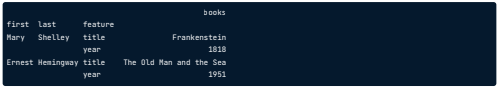

Complex JSON

In [ ]:
writers

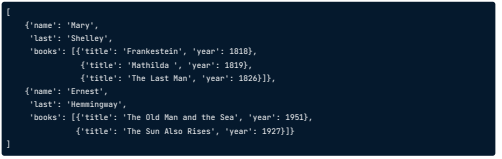

In [ ]:
json_normalize(writers)
name last books
0 Mary Shelley [{'title': 'Frankestein','year': 1818}, {'tit...
1 Ernest Hemmingway [{'title': 'The Old Man and the Sea','year': ...

Record path

In [ ]:
json_normalize(writers, record_path='books')
title year
0 Frankestein 1818
1 Mathilda 1819
2 The Last Man 1826
3 The Old Man and the Sea 1951
4 The Sun Also Rises 1927

Metadata

In [ ]:
json_normalize(writers, record_path='books', meta=['name','last'])
title year name last
0 Frankestein 1818 Mary Shelley
1 Mathilda 1819 Mary Shelley
2 The Last Man 1826 Mary Shelley
3 The Old Man and the Sea 1951 Ernest Hemmingway
4 The Sun Also Rises 1927 Ernest Hemmingway

### Dealing with nested data columns

Review
How to read nested JSON into DataFrame using json
_
normalize() .

Nested data in columns

In [ ]:
writers = ["Mary Shelley","Ernest Hemingway"]
books = ['{"title": "Frankenstein","year": "1818"}','{"title": "The Old Man and the Sea","year":"1951"}']
collection = pd.DataFrame(dict(writers=writers, books=books))
collection
writers books
0 Mary Shelley {'title': 'Frankenstein','year': 1818}
1 Ernest Hemingway {'title': 'The Old Man and the Sea','year': 1951}

Converting nested data

In [ ]:
import json
books = collection['books'].apply(json.loads).apply(pd.Series)
books
title year
0 Frankenstein 1818
1 The Old Man and the Sea 1951

Concatenate back

In [ ]:
collection = collection.drop(columns='books')
pd.concat([collection, books], axis=1)
writers title year
0 Mary Shelley Frankenstein 1818
1 Ernest Hemingway The Old Man and the Sea 1951

Dumping nested data

In [ ]:
import json
books = collection['books'].apply(json.loads).to_list()
books_dump = json.dumps(books)
new_books = pd.read_json(books_dump)
new_books
title year
0 Frankenstein 1818
1 The Old Man and the Sea 1951

In [ ]:
pd.concat([collection['writers'], new_books], axis=1)
writers title year
0 Mary Shelley Frankenstein 1818
1 Ernest Hemingway The Old Man and the Sea 1951

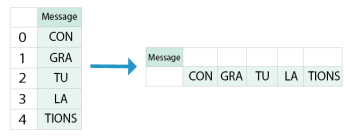

Chapter 1

Concept of long and wide formats
Use .pivot() method - columns as unique
variables, index as individual observations
Create pivot tables
Learn the dierence between .pivot() and
.pivot
_
table()


Chapter 2
From a wide to a long format using:
the .melt() method
the wide
_
to
_
long() function
Spliing or concatenating string columns


Chapter 3
Multi-level index
Use .stack() and .unstack()
Handle generated missing data


Chapter 4
Combine reshaping and grouping processes
List-like column transformation
Nested data in columns

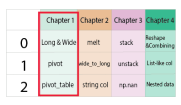